In [37]:
%matplotlib notebook

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split as tts

In [20]:
X, y = make_regression(n_samples=100, n_features=2, noise=10.5)

In [25]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)

<IPython.core.display.Javascript object>


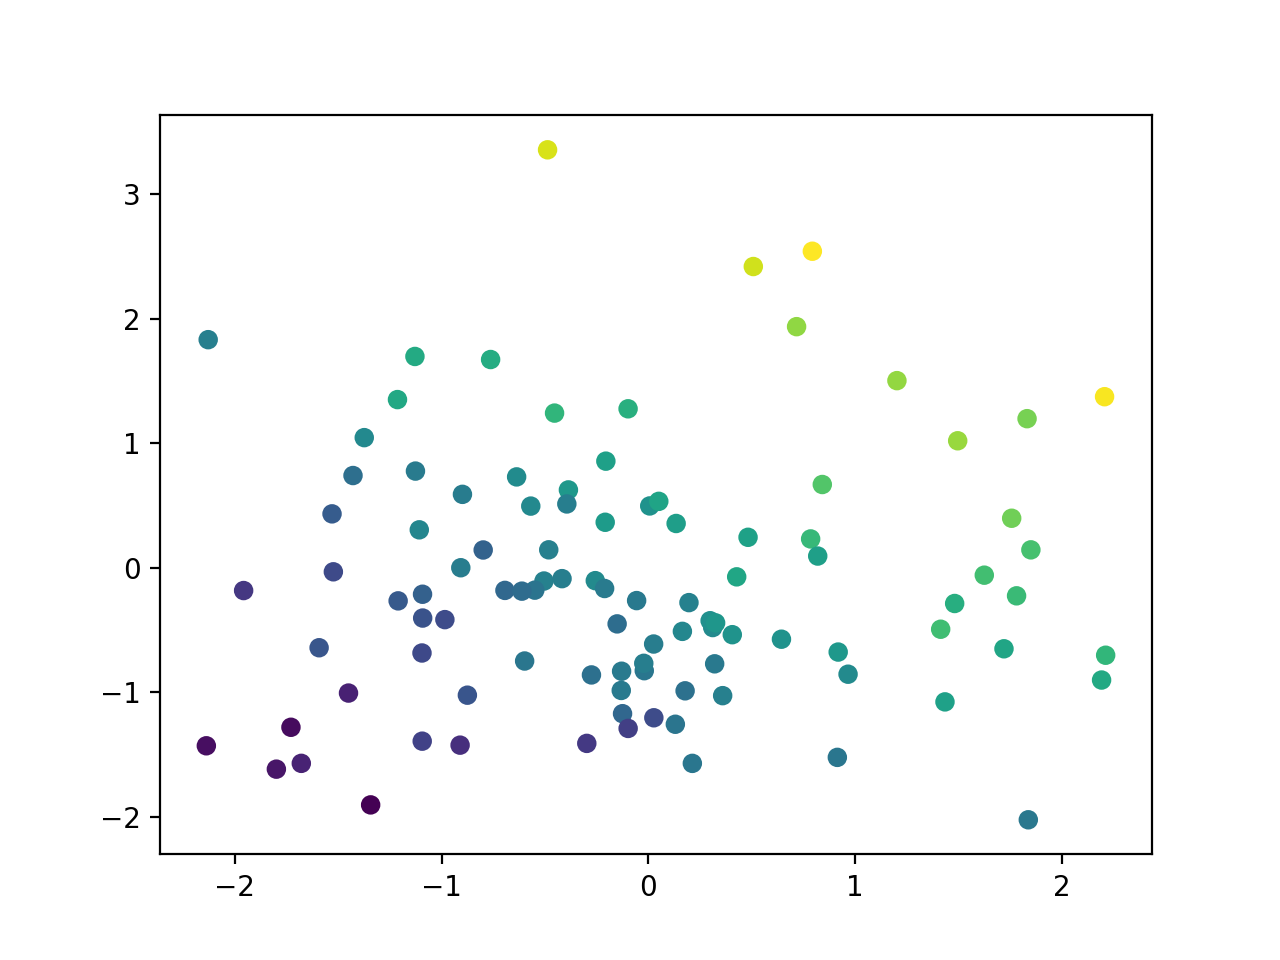

In [36]:
plt.scatter(X[:,0], X[:,1], c=y)

<IPython.core.display.Javascript object>


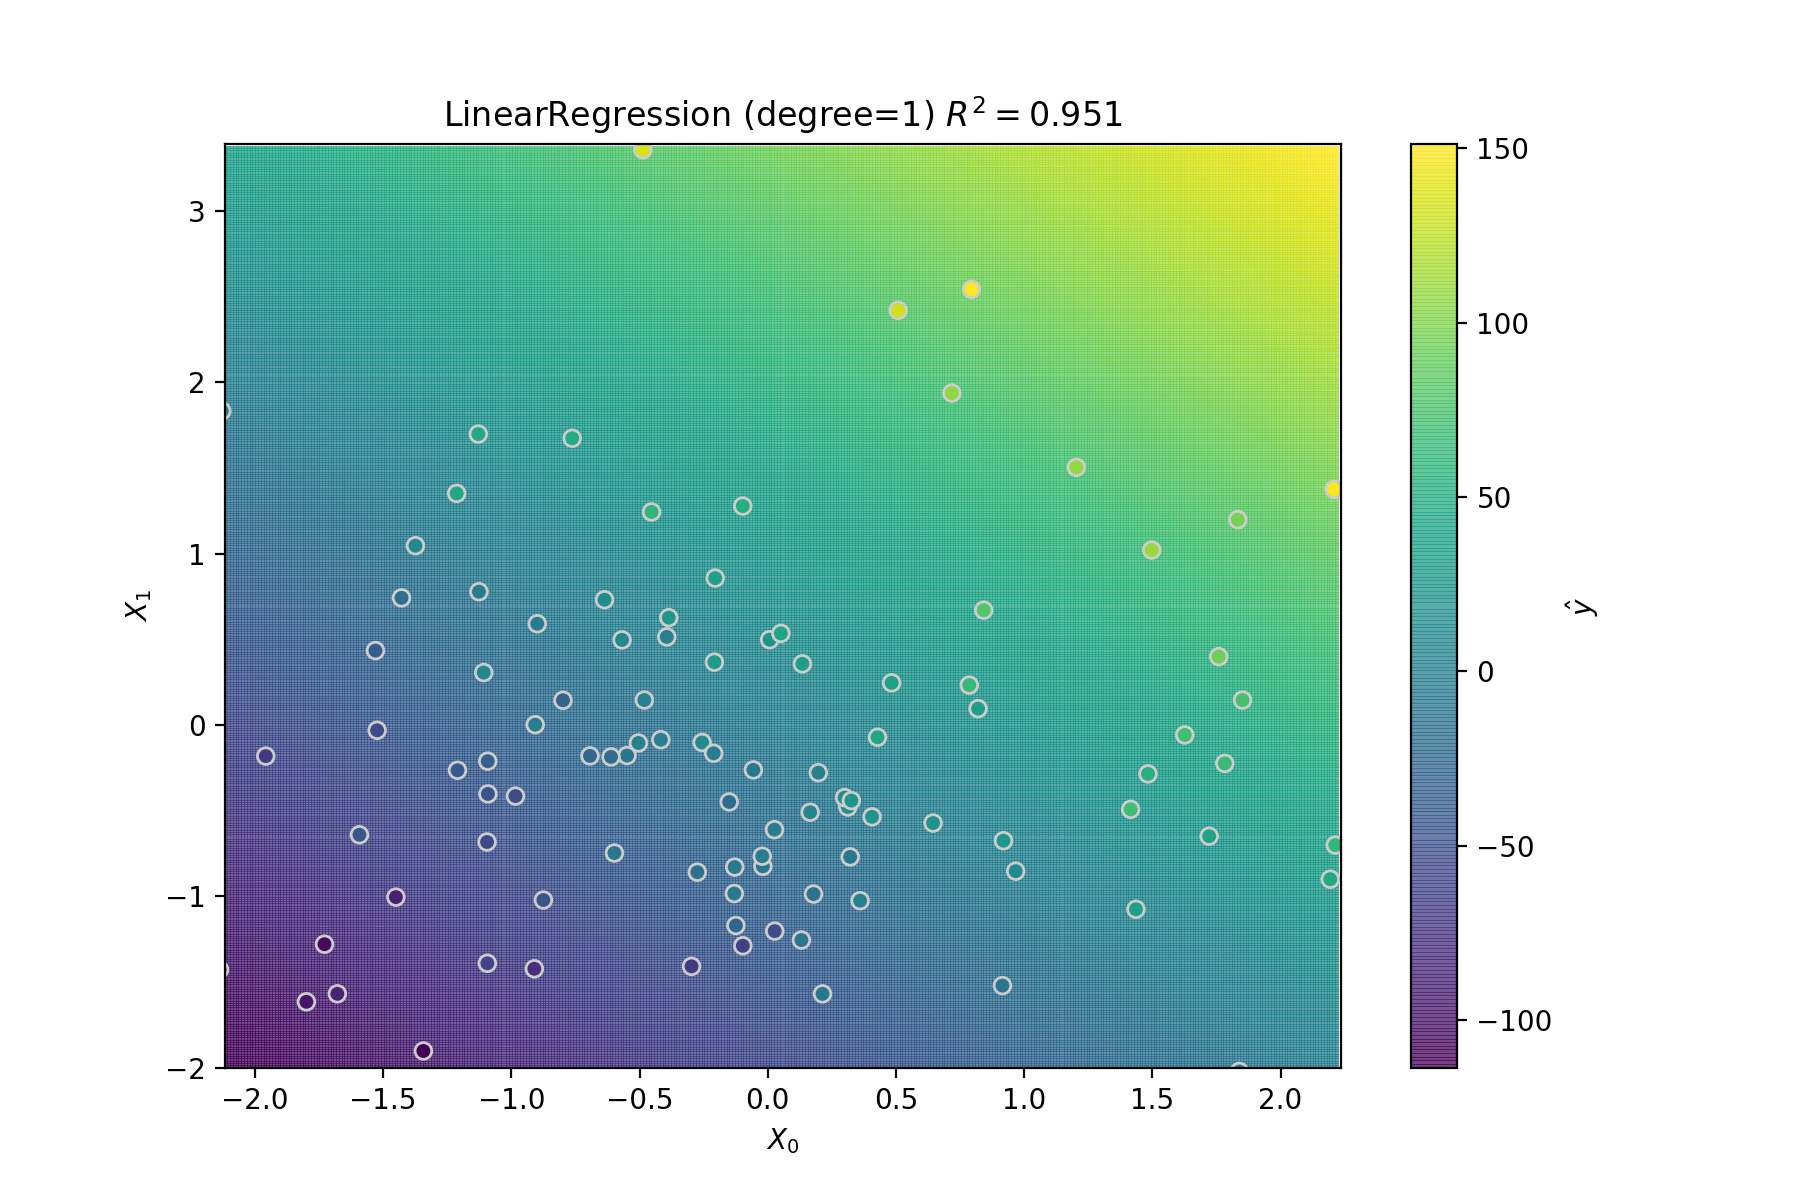

In [79]:
mdl = LinearRegression().fit(X, y)
score = mdl.score(X,y)

plot_decision(mdl, X, y, score)

<IPython.core.display.Javascript object>


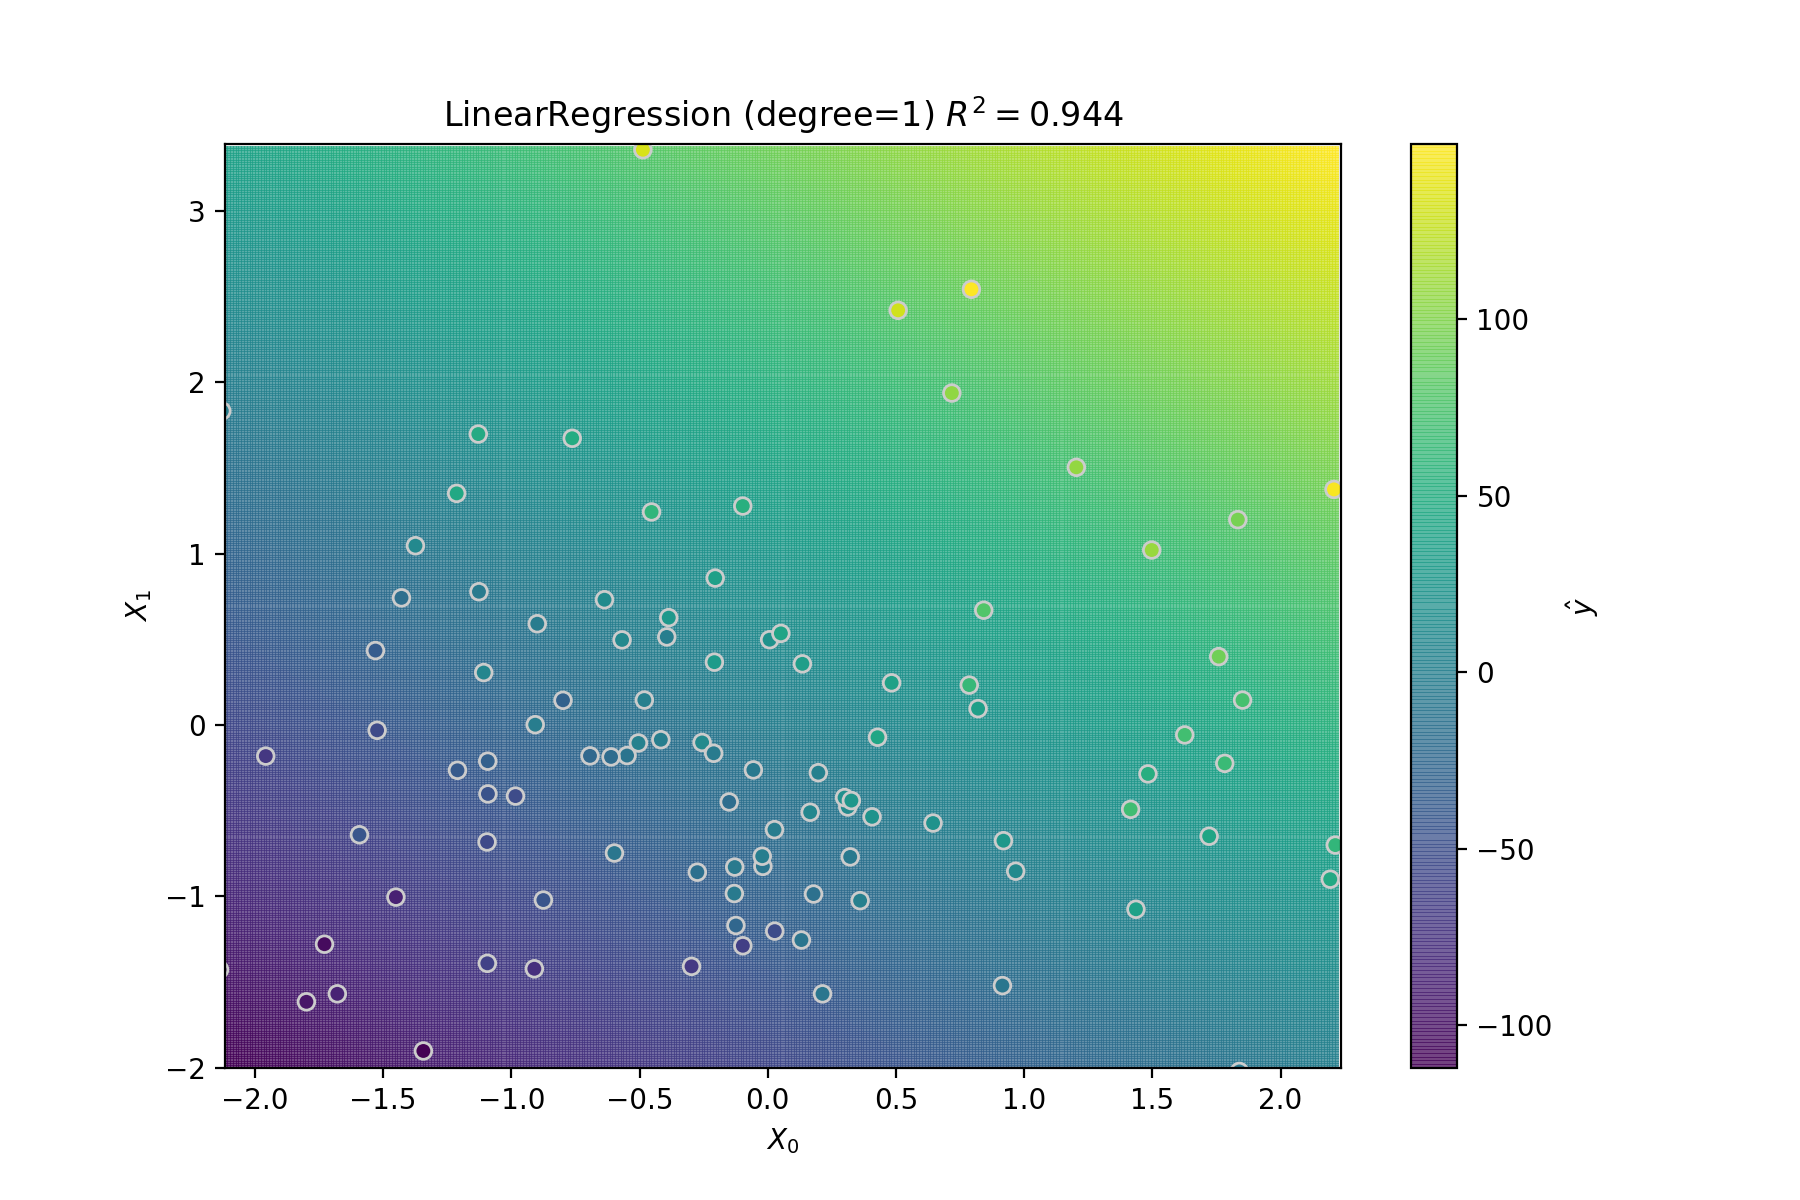

In [82]:
mdl = LinearRegression().fit(X_train, y_train)
score = mdl.score(X_test, y_test)

plot_decision(mdl, X, y, score)

<IPython.core.display.Javascript object>


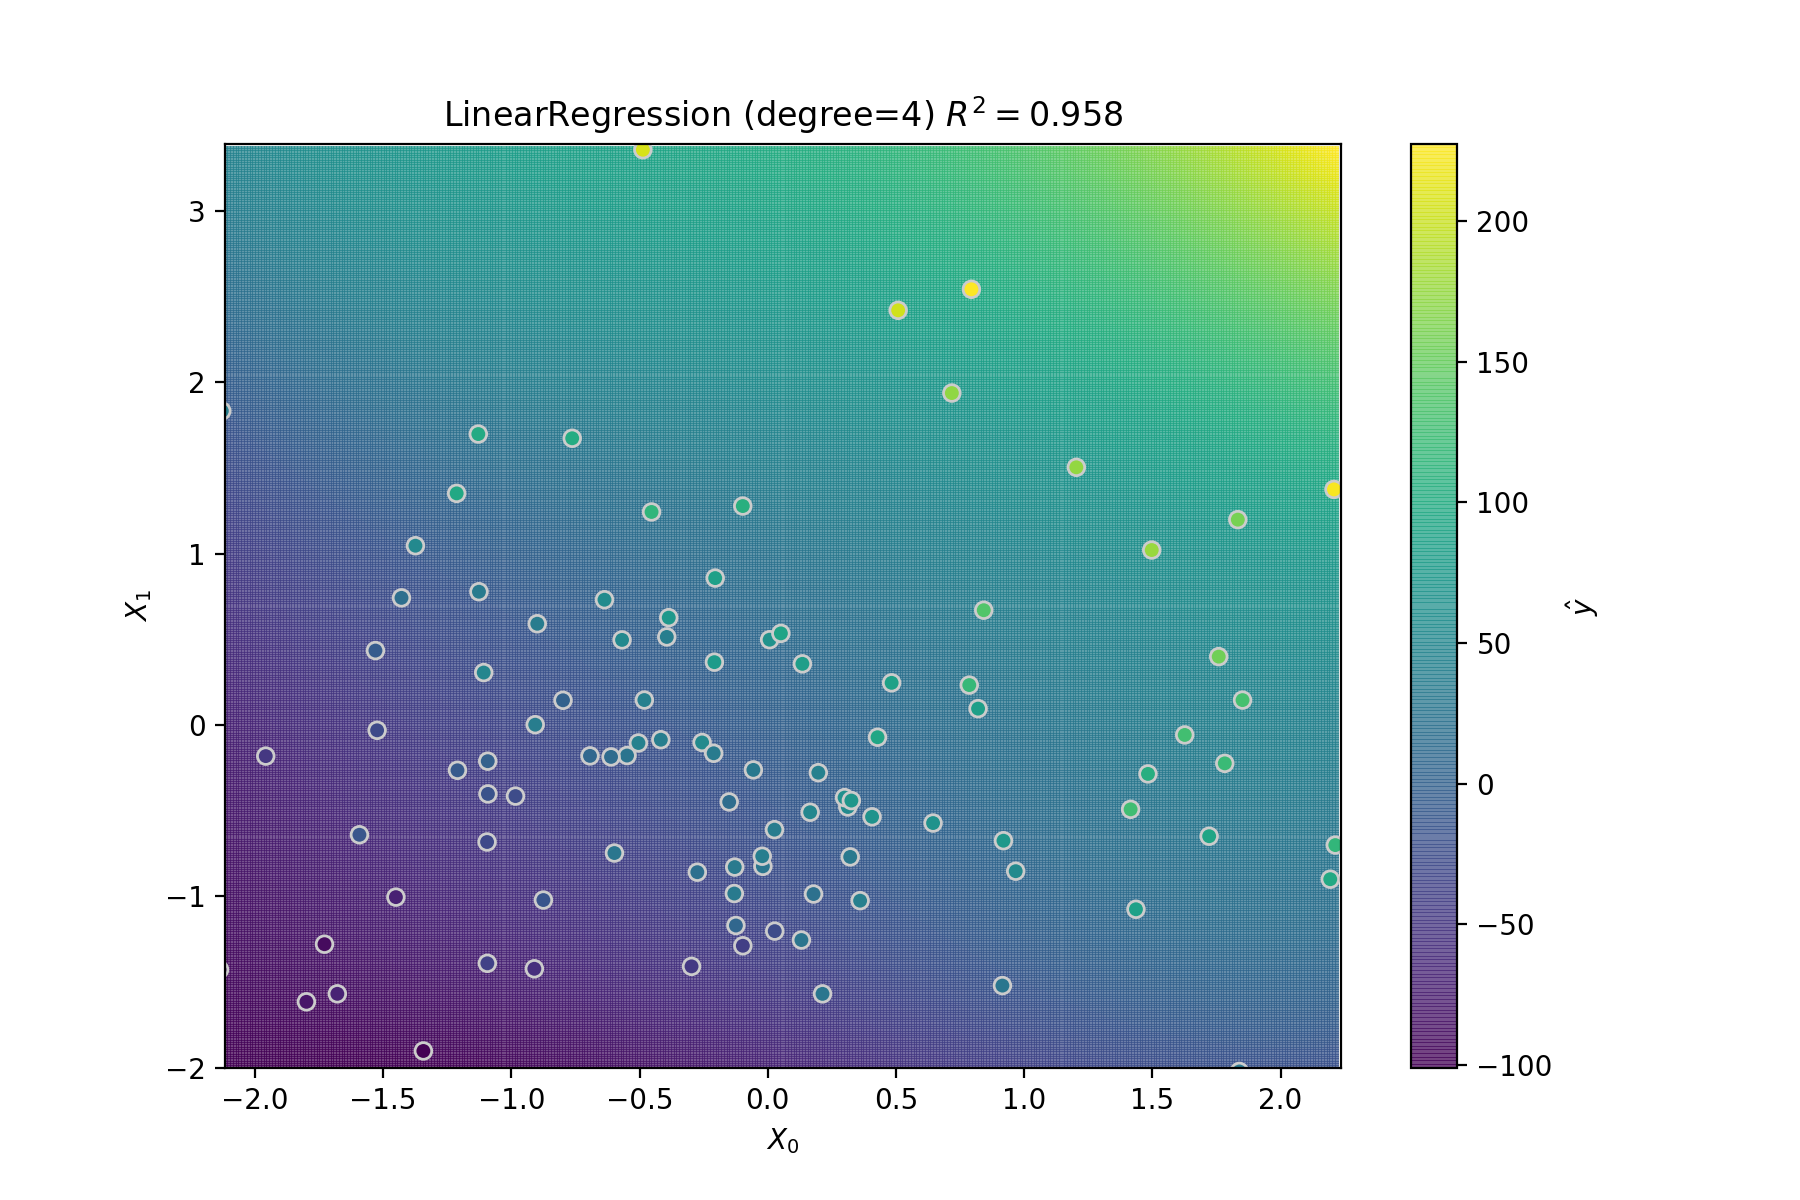

In [83]:
mdl = make_pipeline(PolynomialFeatures(4), LinearRegression()).fit(X, y)
score = mdl.score(X,y)

plot_decision(mdl, X, y, score)

<IPython.core.display.Javascript object>


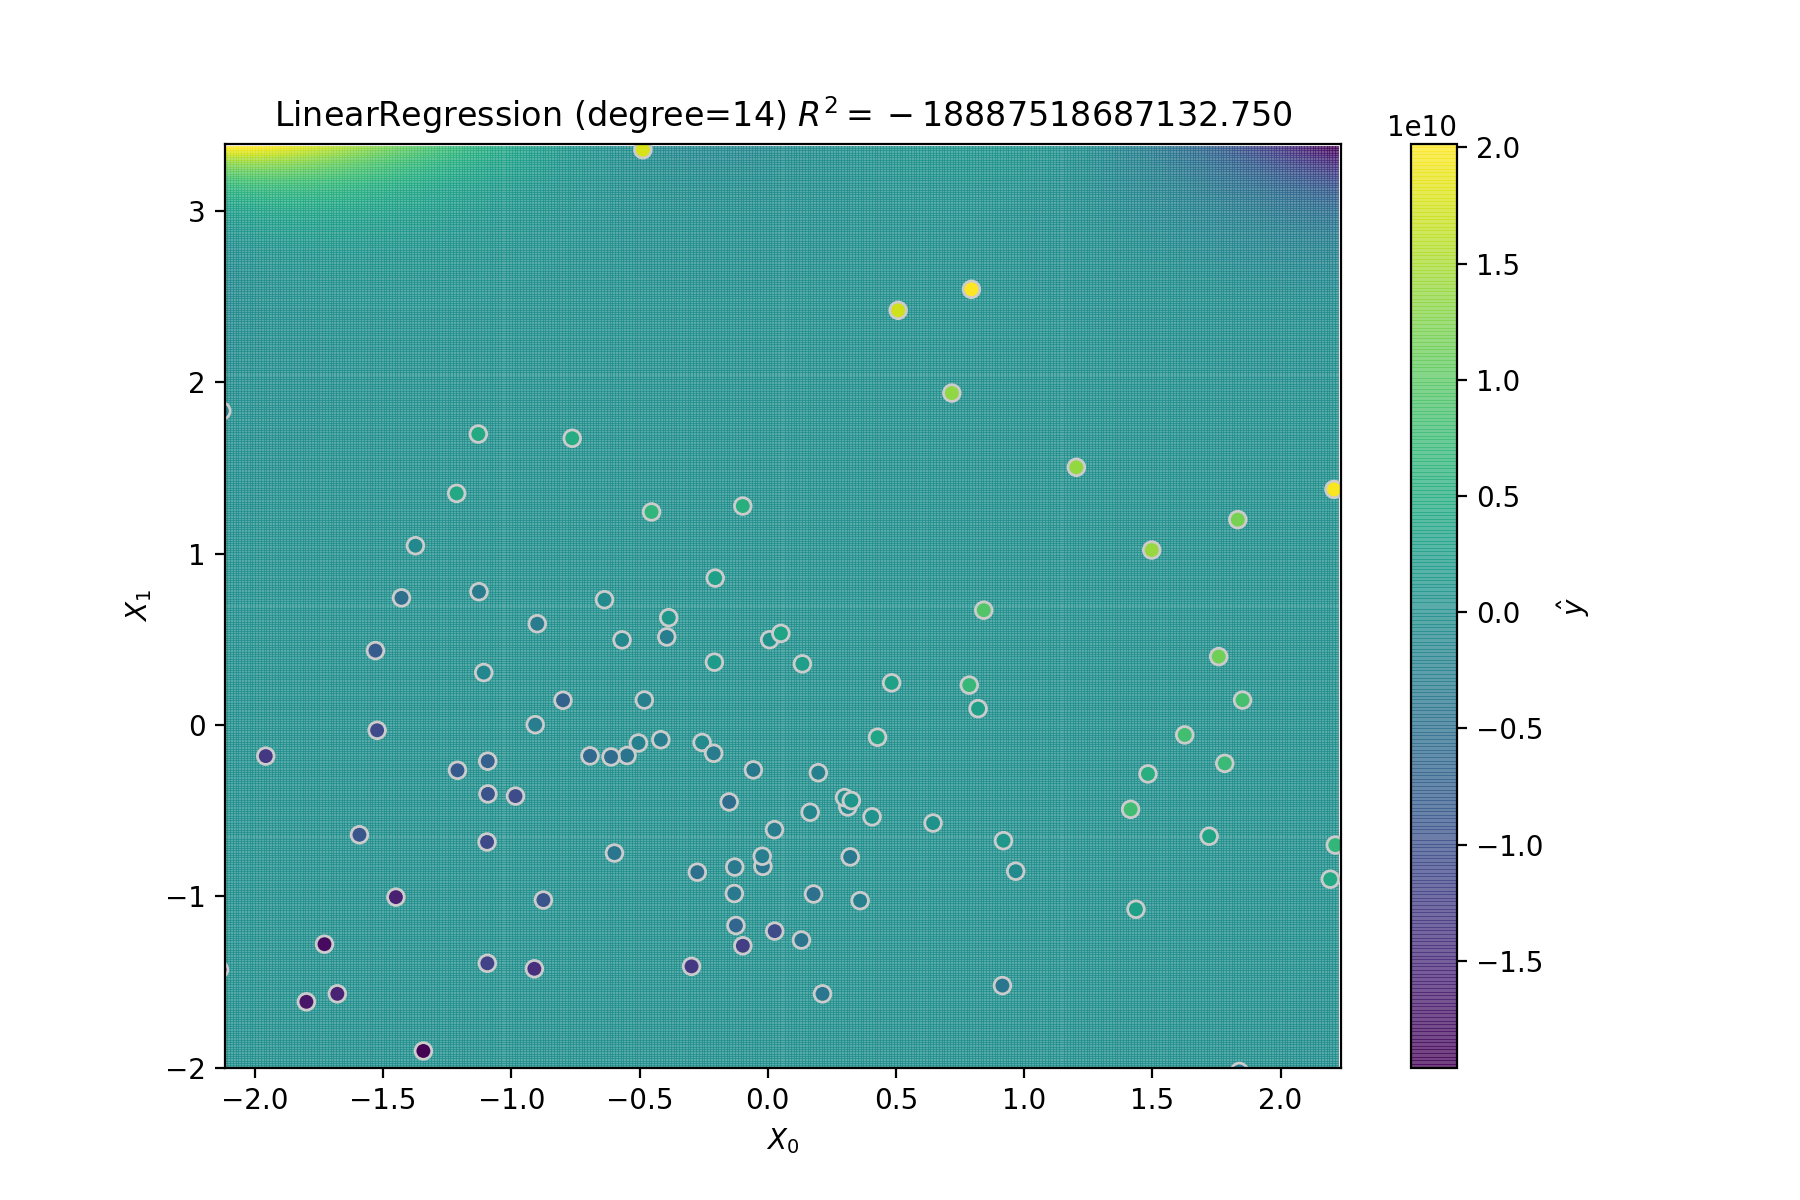

In [84]:
mdl = make_pipeline(PolynomialFeatures(14), LinearRegression()).fit(X_train, y_train)
score = mdl.score(X_test,y_test)

plot_decision(mdl, X, y, score)

<IPython.core.display.Javascript object>


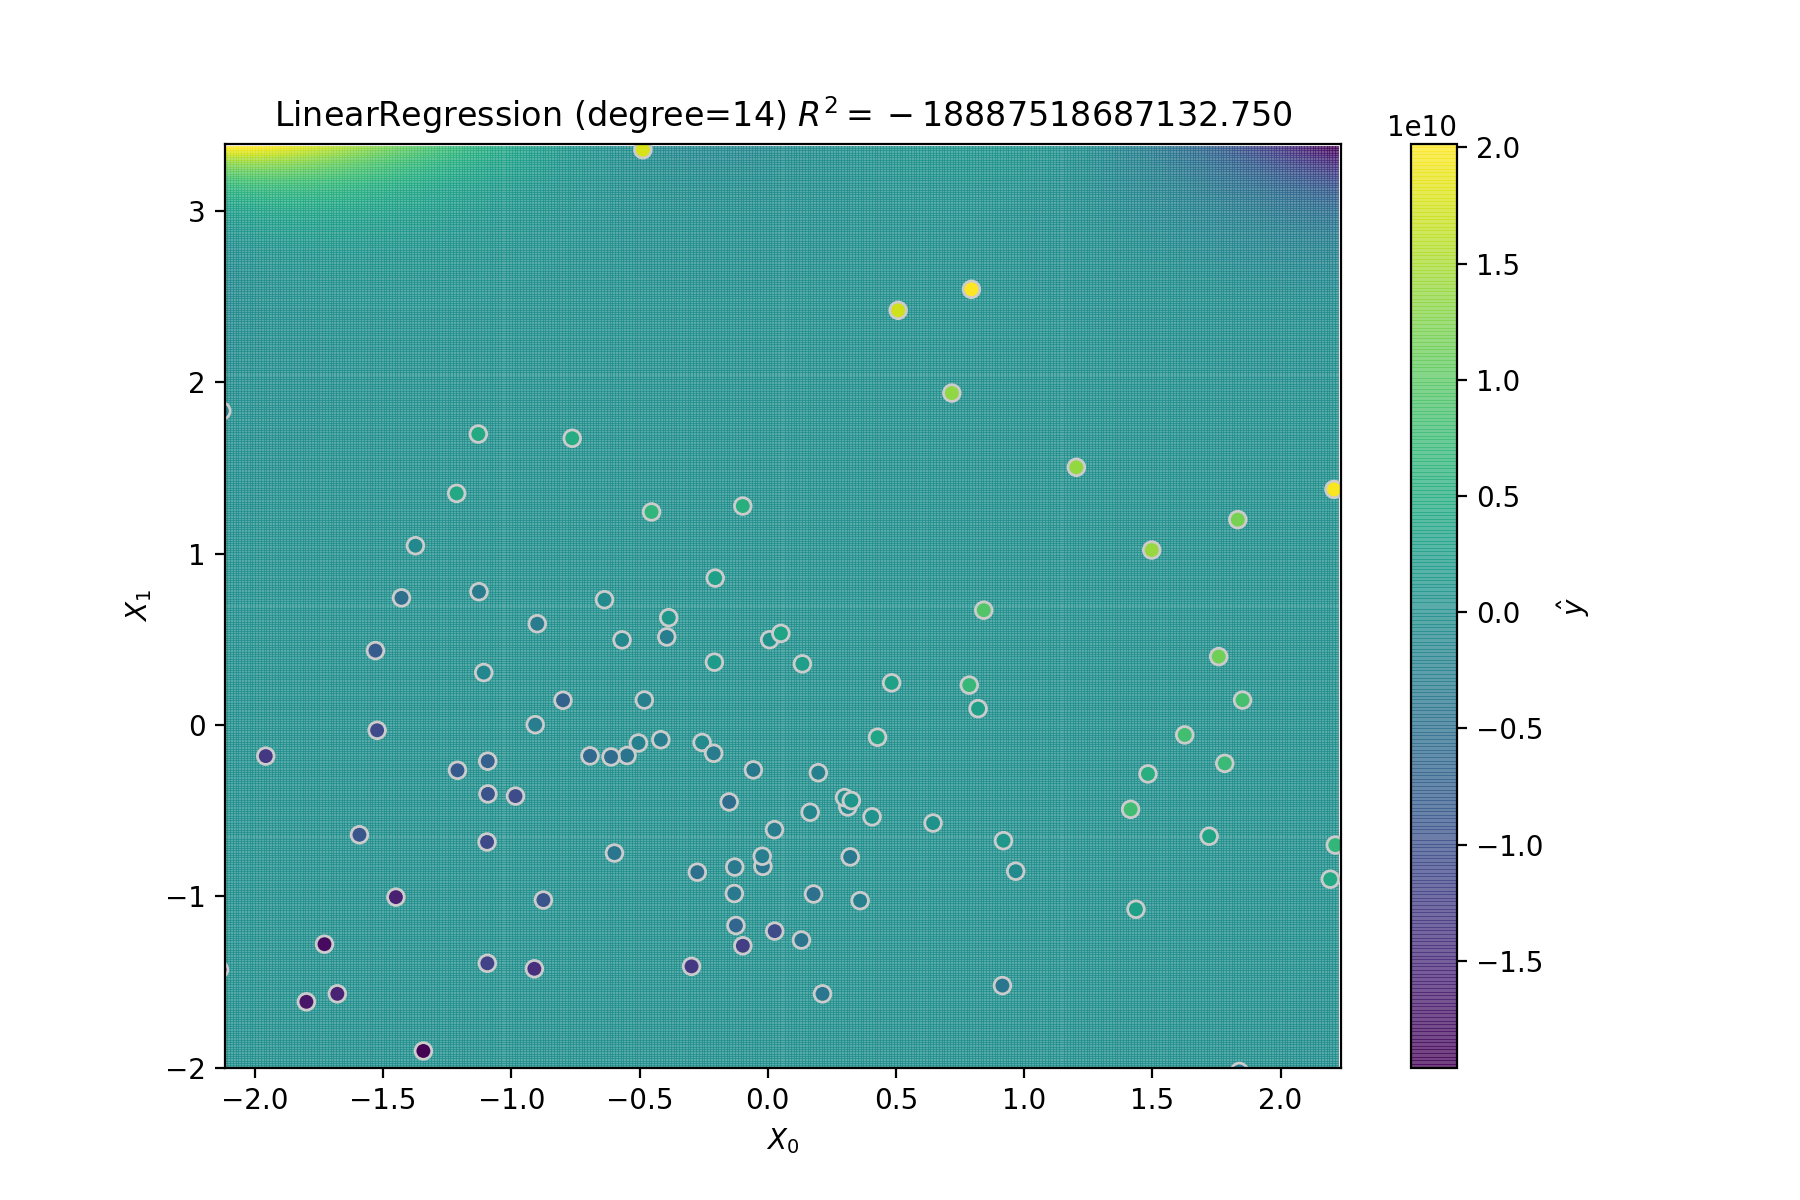

In [78]:
def plot_decision(mdl, X, y, score=None):
    _, ax = plt.subplots(figsize=(9,6))
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - (X[:, 0].min() * .01), X[:, 0].max() + (X[:, 0].max() * .01)
    y_min, y_max = X[:, 1].min() - (X[:, 1].min() * .01), X[:, 1].max() + (X[:, 1].max() * .01)

    ax.set_xlim([x_min, x_max])
    ax.set_ylim([y_min, y_max])
    # set the step increment for drawing the boundary graph
    x_step = (x_max - x_min) * 0.0025
    y_step = (y_max - y_min) * 0.0025

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, x_step), np.arange(y_min, y_max, y_step))

    # raise Exception(self.yy.ravel().shape)
    Z = mdl.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    mesh = ax.pcolormesh(xx, yy, Z, alpha=0.75)
    
    ax.scatter(X[:,0], X[:,1], c=y, edgecolor='#CCCCCC')
    
    ax.set_xlabel("$X_0$")
    ax.set_ylabel("$X_1$")
    
    est = mdl if not isinstance(mdl, Pipeline) else mdl.steps[-1][1]
    deg = 1 if not isinstance(mdl, Pipeline) else mdl.steps[0][1].degree
    name = "{} (degree={})".format(est.__class__.__name__, deg)
    if score:
        name += " $R^2={:0.3f}$".format(score)
    ax.set_title("{}".format(name))
    
    cbar = plt.colorbar(mesh, label="$\hat{y}$")
    
    return ax
    
plot_decision(mdl, X, y, score)